# Automatização de Catalogação de Moda

In [14]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Carregando os dados

In [15]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Pré-processamento

#### 1. Normalização dos pixels para valores entre 0 e 1, facilitando o aprendizado da rede:

In [16]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#### 2. Transformação para vetor unidimensional (reshape), já que o MLP recebe entradas em vetor:

In [17]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

#### 3. Codificação one-hot das classes para representação adequada das saídas categóricas:

In [18]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Estrutura Base do Modelo em Keras

## Arquitetura robusta

In [6]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),  # camada oculta com relu
    Dense(128, activation='relu'),                       # segunda camada oculta com relu
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')                     # camada de saída (softmax)
])

# Camada de entrada: recebe vetores de 784 posições (28x28 pixels)

# Camadas ocultas: uso da ativação ReLU para capturar relações não lineares

# Camada de saída: 10 neurônios com ativação softmax, retornando a probabilidade de cada classe

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# O modelo é então compilado com otimizador e função de perda apropriados:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# E treinado com:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7379 - loss: 0.7597 - val_accuracy: 0.8462 - val_loss: 0.4310
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8582 - loss: 0.3937 - val_accuracy: 0.8654 - val_loss: 0.3739
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8746 - loss: 0.3409 - val_accuracy: 0.8656 - val_loss: 0.3795
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8816 - loss: 0.3172 - val_accuracy: 0.8775 - val_loss: 0.3423
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8935 - loss: 0.2903 - val_accuracy: 0.8774 - val_loss: 0.3434
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8956 - loss: 0.2779 - val_accuracy: 0.8752 - val_loss: 0.3554
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8983 - loss: 0.2688 - val_accuracy: 0.8808 - val_loss: 0.3440
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9048 - loss: 0.2536 - val_accur

## Funções Úteis para Visualização

### Curvas de treino e validação

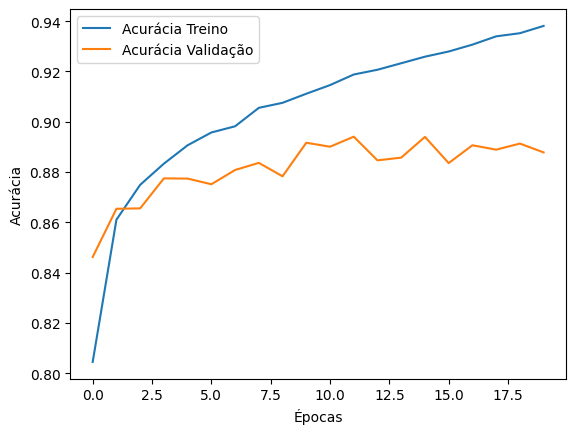

In [9]:
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

### Matriz de confusão

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


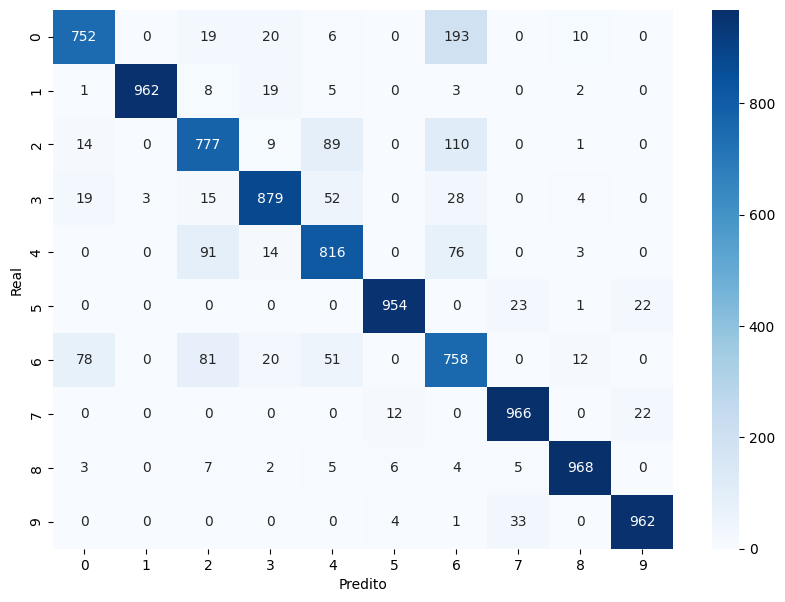

In [10]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

## Arquitetura media com Tanh

In [11]:
model = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),  # camada oculta com tanh
    Dense(64, activation='tanh'),                       # segunda camada oculta com tanh
    Dense(10, activation='softmax')                     # camada de saída
])

# Camada de entrada: recebe vetores de 784 posições (28x28 pixels)

# Camadas ocultas: uso da ativação Tanh para capturar relações não lineares

# Camada de saída: 10 neurônios com ativação softmax, retornando a probabilidade de cada classe


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# O modelo é então compilado com otimizador e função de perda apropriados:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# E treinado com:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7389 - loss: 0.7558 - val_accuracy: 0.8537 - val_loss: 0.4142
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8514 - loss: 0.4023 - val_accuracy: 0.8611 - val_loss: 0.3835
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8716 - loss: 0.3559 - val_accuracy: 0.8657 - val_loss: 0.3687
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8780 - loss: 0.3356 - val_accuracy: 0.8751 - val_loss: 0.3420
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8867 - loss: 0.3125 - val_accuracy: 0.8798 - val_loss: 0.3361
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8926 - loss: 0.2942 - val_accuracy: 0.8733 - val_loss: 0.3386
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8939 - loss: 0.2805 - val_accuracy: 0.8812 - val_loss: 0.3203
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9030 - loss: 0.2653 - val_accuracy: 0.

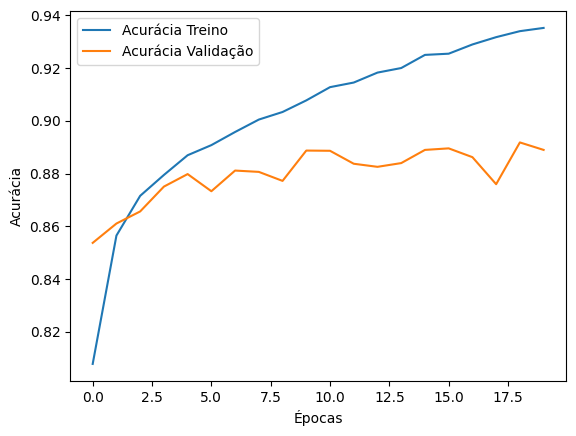

In [19]:
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


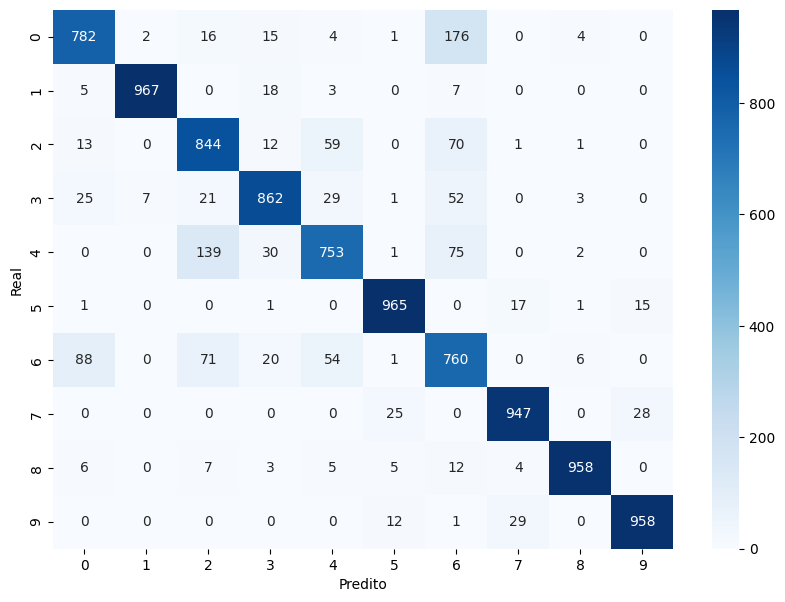

In [20]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Arquitetura Simples com sigmoide

In [21]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(784,)),  # camada oculta
    Dense(10, activation='softmax')                       # saída
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# O modelo é então compilado com otimizador e função de perda apropriados:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# E treinado com:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6621 - loss: 1.1982 - val_accuracy: 0.8184 - val_loss: 0.5579
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8288 - loss: 0.5194 - val_accuracy: 0.8386 - val_loss: 0.4608
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8448 - loss: 0.4489 - val_accuracy: 0.8502 - val_loss: 0.4267
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8555 - loss: 0.4127 - val_accuracy: 0.8564 - val_loss: 0.4055
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8628 - loss: 0.3899 - val_accuracy: 0.8589 - val_loss: 0.3984
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8713 - loss: 0.3659 - val_accuracy: 0.8651 - val_loss: 0.3766
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8712 - loss: 0.3572 - val_accuracy: 0.8643 - val_loss: 0.3748
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8772 - loss: 0.3457 - val_accuracy: 0.

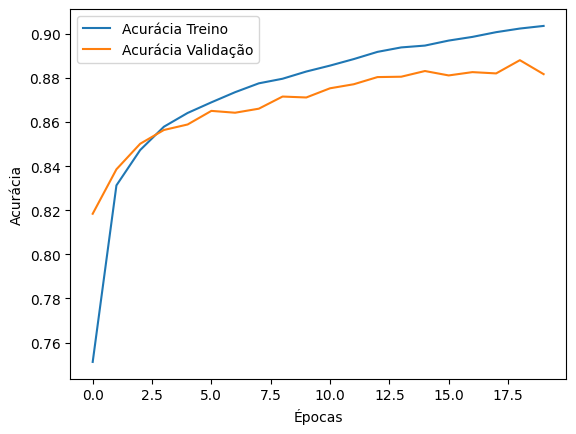

In [24]:
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


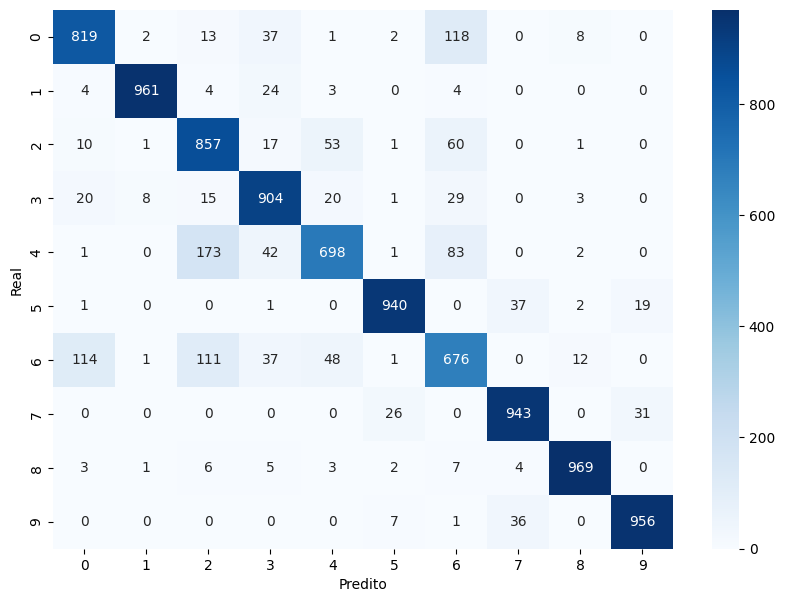

In [25]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Com dropout

In [26]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# O modelo é então compilado com otimizador e função de perda apropriados:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# E treinado com:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6622 - loss: 0.9636 - val_accuracy: 0.8383 - val_loss: 0.4383
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8374 - loss: 0.4616 - val_accuracy: 0.8627 - val_loss: 0.3820
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8529 - loss: 0.4097 - val_accuracy: 0.8643 - val_loss: 0.3775
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8625 - loss: 0.3852 - val_accuracy: 0.8735 - val_loss: 0.3522
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8707 - loss: 0.3577 - val_accuracy: 0.8760 - val_loss: 0.3423
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8735 - loss: 0.3462 - val_accuracy: 0.8815 - val_loss: 0.3325
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8822 - loss: 0.3259 - val_accuracy: 0.8796 - val_loss: 0.3237
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8874 - loss: 0.3112 - val_accu

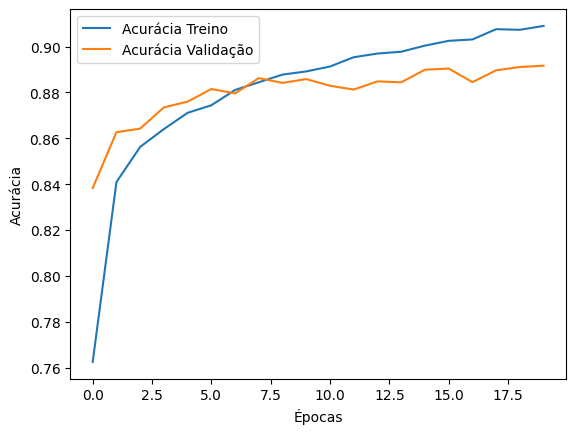

In [29]:
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


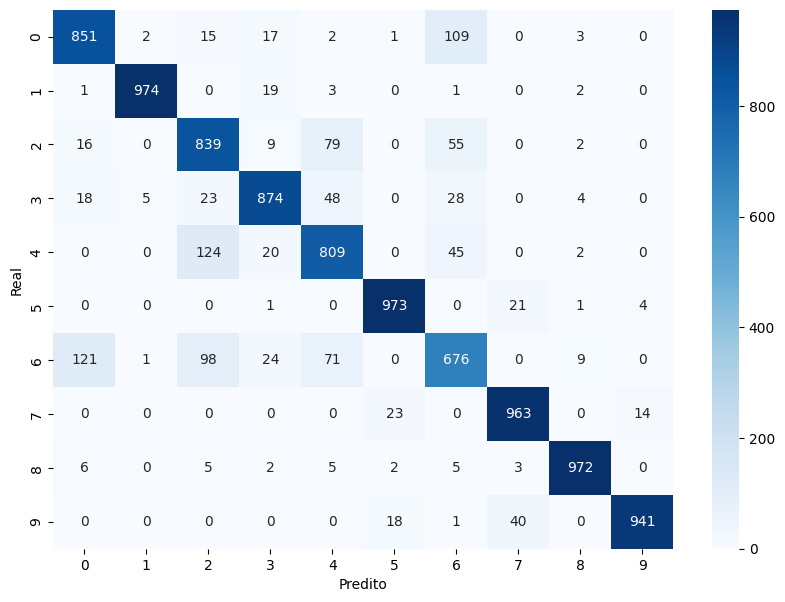

In [30]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Com early stopping

In [33]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train.argmax(axis=1)
)

model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping mais robusto
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Treinamento com batch maior
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop],
    verbose=2
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
240/240 - 5s - 21ms/step - accuracy: 0.7268 - loss: 0.7783 - val_accuracy: 0.8199 - val_loss: 0.5134
Epoch 2/20
240/240 - 4s - 17ms/step - accuracy: 0.8265 - loss: 0.4910 - val_accuracy: 0.8477 - val_loss: 0.4217
Epoch 3/20
240/240 - 2s - 10ms/step - accuracy: 0.8447 - loss: 0.4351 - val_accuracy: 0.8564 - val_loss: 0.4058
Epoch 4/20
240/240 - 2s - 10ms/step - accuracy: 0.8527 - loss: 0.4055 - val_accuracy: 0.8540 - val_loss: 0.3951
Epoch 5/20
240/240 - 2s - 10ms/step - accuracy: 0.8629 - loss: 0.3807 - val_accuracy: 0.8661 - val_loss: 0.3673
Epoch 6/20
240/240 - 4s - 15ms/step - accuracy: 0.8680 - loss: 0.3644 - val_accuracy: 0.8596 - val_loss: 0.3874
Epoch 7/20
240/240 - 4s - 16ms/step - accuracy: 0.8712 - loss: 0.3492 - val_accuracy: 0.8712 - val_loss: 0.3664
Epoch 8/20
240/240 - 2s - 10ms/step - accuracy: 0.8755 - loss: 0.3392 - val_accuracy: 0.8751 - val_loss: 0.3453
Epoch 9/20
240/240 - 2s - 10ms/step - accuracy: 0.8807 - loss: 0.3254 - val_accuracy: 0.8770 - val_loss:

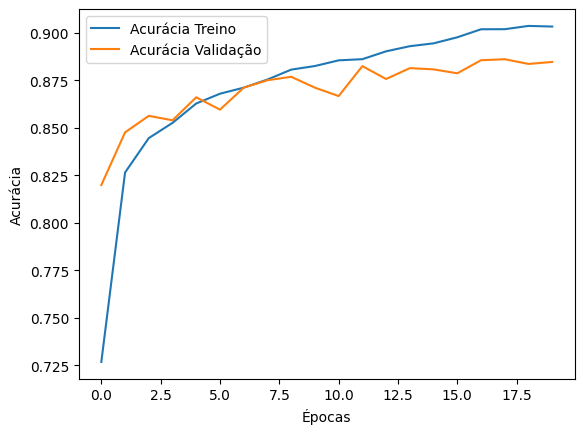

In [34]:
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


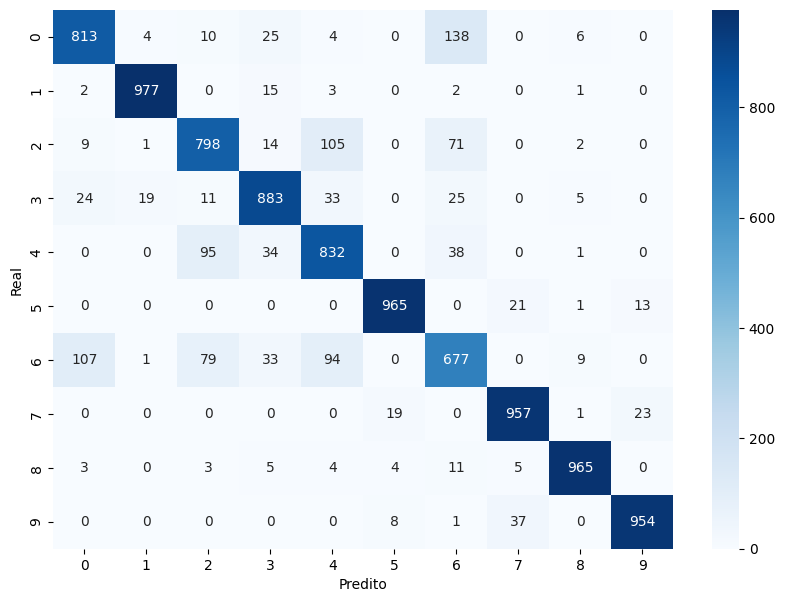

In [35]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Melhorias Implementadas

## 1. Otimização de Learning Rate

Implementaremos diferentes estratégias de otimização do learning rate para melhorar a convergência do modelo.

In [36]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
import math
import numpy as np

### 1.1 Estratégia 1: ReduceLROnPlateau

Esta estratégia reduz o learning rate quando a métrica de validação para de melhorar.

In [37]:
# Modelo com ReduceLROnPlateau
model_reduce_lr = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilação com learning rate inicial mais alto
model_reduce_lr.compile(
    optimizer=Adam(learning_rate=0.01),  # LR inicial mais alto
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback para reduzir LR quando val_loss para de melhorar
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,          # Reduz LR pela metade
    patience=5,          # Espera 5 épocas sem melhoria
    min_lr=1e-7,         # LR mínimo
    verbose=1
)

# Early stopping para evitar overfitting
early_stop_lr = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

print("Modelo com ReduceLROnPlateau configurado!")

Modelo com ReduceLROnPlateau configurado!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Treinamento com ReduceLROnPlateau
print("Iniciando treinamento com ReduceLROnPlateau...")

history_reduce_lr = model_reduce_lr.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=128,
    callbacks=[reduce_lr, early_stop_lr],
    verbose=1
)

print("\nTreinamento com ReduceLROnPlateau concluído!")

Iniciando treinamento com ReduceLROnPlateau...
Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8403 - loss: 0.4386 - val_accuracy: 0.8283 - val_loss: 0.4606 - learning_rate: 0.0100
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8509 - loss: 0.4082 - val_accuracy: 0.8559 - val_loss: 0.3976 - learning_rate: 0.0100
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8624 - loss: 0.3687 - val_accuracy: 0.8504 - val_loss: 0.4268 - learning_rate: 0.0100
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8658 - loss: 0.3610 - val_accuracy: 0.8568 - val_loss: 0.4044 - learning_rate: 0.0100
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8739 - loss: 0.3413 - val_accuracy: 0.8552 - val_loss: 0.4169 - learning_rate: 0.0100
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8768 - loss: 0.3321 - val_accuracy: 0.8647 - val_loss: 0.3910 - learning_rate: 0.0100
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━

## 2. Regularização L1/L2

Implementaremos diferentes tipos de regularização para prevenir overfitting e melhorar a generalização do modelo.

In [40]:
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf

### 2.1 Regularização L1 (Lasso)

A regularização L1 promove esparsidade nos pesos, efetivamente realizando seleção de features.

In [41]:
# Modelo com regularização L1
model_l1 = Sequential([
    Dense(256, activation='relu', input_shape=(784,),
          kernel_regularizer=l1(0.01)),  # L1 regularization
    Dropout(0.3),
    Dense(128, activation='relu',
          kernel_regularizer=l1(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu',
          kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model_l1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Modelo com regularização L1 configurado!")
print(f"Número de parâmetros: {model_l1.count_params():,}")

Modelo com regularização L1 configurado!
Número de parâmetros: 242,762


In [42]:
# Treinamento com regularização L1
print("Iniciando treinamento com regularização L1...")

early_stop_l1 = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history_l1 = model_l1.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop_l1],
    verbose=1
)

print("\nTreinamento com regularização L1 concluído!")

Iniciando treinamento com regularização L1...
Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 66s 268ms/step - accuracy: 0.1713 - loss: 40.3987 - val_accuracy: 0.1000 - val_loss: 2.5902
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0993 - loss: 2.5900 - val_accuracy: 0.1000 - val_loss: 2.5907
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0973 - loss: 2.5900 - val_accuracy: 0.1000 - val_loss: 2.5904
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0991 - loss: 2.5900 - val_accuracy: 0.1000 - val_loss: 2.5900
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.0983 - loss: 2.5900 - val_accuracy: 0.1000 - val_loss: 2.5901
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1008 - loss: 2.5899 - val_accuracy: 0.1000 - val_loss: 2.5906
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0985 - loss: 2.5899 - val_accuracy: 0.1000 - val_loss: 2.5895
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/

### 2.2 Regularização L2 (Ridge)

A regularização L2 penaliza pesos grandes, promovendo pesos menores e mais distribuídos.

In [43]:
# Modelo com regularização L2
model_l2 = Sequential([
    Dense(256, activation='relu', input_shape=(784,),
          kernel_regularizer=l2(0.01)),  # L2 regularization
    Dropout(0.3),
    Dense(128, activation='relu',
          kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu',
          kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model_l2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Modelo com regularização L2 configurado!")
print(f"Número de parâmetros: {model_l2.count_params():,}")

Modelo com regularização L2 configurado!
Número de parâmetros: 242,762


In [44]:
# Treinamento com regularização L2
print("Iniciando treinamento com regularização L2...")

early_stop_l2 = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history_l2 = model_l2.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop_l2],
    verbose=1
)

print("\nTreinamento com regularização L2 concluído!")

Iniciando treinamento com regularização L2...
Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5496 - loss: 4.4782 - val_accuracy: 0.7952 - val_loss: 1.1826
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7628 - loss: 1.1800 - val_accuracy: 0.7949 - val_loss: 0.9163
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7725 - loss: 0.9709 - val_accuracy: 0.8029 - val_loss: 0.8523
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7885 - loss: 0.8957 - val_accuracy: 0.7992 - val_loss: 0.8272
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7870 - loss: 0.8732 - val_accuracy: 0.8142 - val_loss: 0.7908
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7888 - loss: 0.8540 - val_accuracy: 0.7990 - val_loss: 0.7969
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7936 - loss: 0.8383 - val_accuracy: 0.8181 - val_loss: 0.7530
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/ste

### 2.3 Regularização L1+L2 (Elastic Net)

Combina os benefícios das regularizações L1 e L2.

In [45]:
# Modelo com regularização L1+L2
model_l1_l2 = Sequential([
    Dense(256, activation='relu', input_shape=(784,),
          kernel_regularizer=l1_l2(l1=0.005, l2=0.005)),  # L1+L2 regularization
    BatchNormalization(),  # Adicionando Batch Normalization
    Dropout(0.3),
    Dense(128, activation='relu',
          kernel_regularizer=l1_l2(l1=0.005, l2=0.005)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu',
          kernel_regularizer=l1_l2(l1=0.005, l2=0.005)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model_l1_l2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Modelo com regularização L1+L2 e Batch Normalization configurado!")
print(f"Número de parâmetros: {model_l1_l2.count_params():,}")

Modelo com regularização L1+L2 e Batch Normalization configurado!
Número de parâmetros: 244,554


In [46]:
# Treinamento com regularização L1+L2
print("Iniciando treinamento com regularização L1+L2...")

# Combinando com otimização de learning rate
reduce_lr_l1_l2 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

early_stop_l1_l2 = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history_l1_l2 = model_l1_l2.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=128,
    callbacks=[reduce_lr_l1_l2, early_stop_l1_l2],
    verbose=1
)

print("\nTreinamento com regularização L1+L2 concluído!")

Iniciando treinamento com regularização L1+L2...
Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6493 - loss: 30.2958 - val_accuracy: 0.4207 - val_loss: 4.6023 - learning_rate: 0.0010
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7450 - loss: 2.7714 - val_accuracy: 0.6169 - val_loss: 2.8028 - learning_rate: 0.0010
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7500 - loss: 2.0891 - val_accuracy: 0.7553 - val_loss: 2.0044 - learning_rate: 0.0010
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7561 - loss: 1.9464 - val_accuracy: 0.7559 - val_loss: 1.9390 - learning_rate: 0.0010
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7584 - loss: 1.8916 - val_accuracy: 0.7038 - val_loss: 2.0627 - learning_rate: 0.0010
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7527 - loss: 1.8355 - val_accuracy: 0.6600 - val_loss: 2.0259 - learning_rate: 0.0010
Epoch 7/20
240/240 ━━━━━━━━━━━━━

### Comparação Final de Todos os Modelos

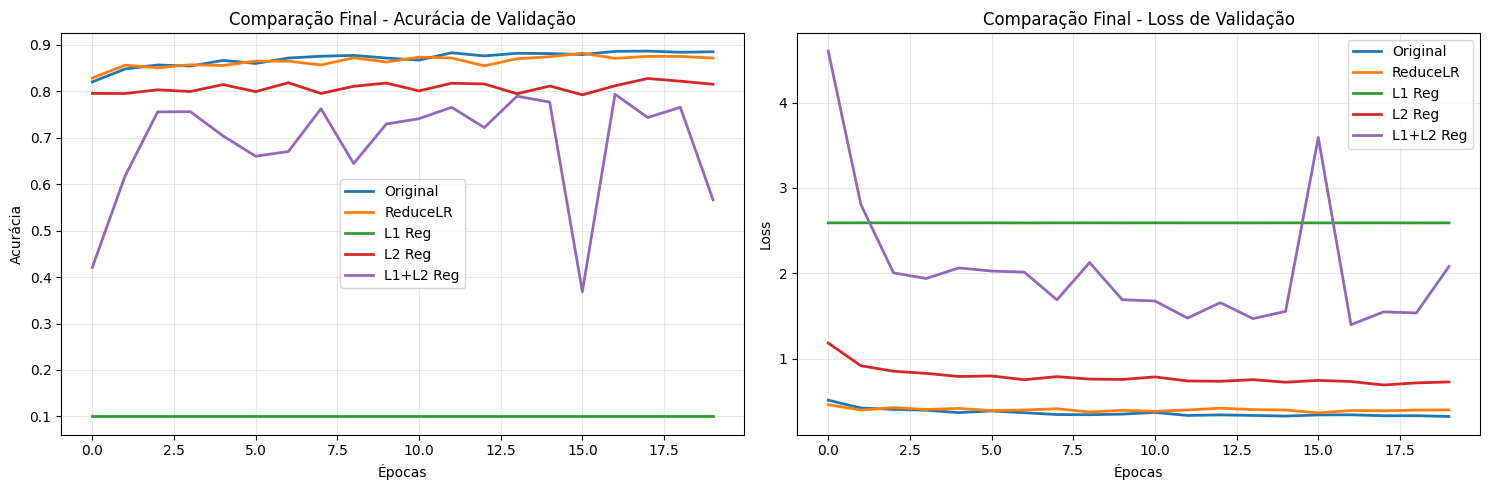

Modelo Original      0.8862          0.3227       0.0175      
ReduceLR             0.8816          0.3643       0.0365      
L1 Regularization    0.1000          2.5895       0.0390      
L2 Regularization    0.8272          0.6910       -0.0220     
L1+L2 + BatchNorm    0.7934          1.3979       -0.0246     


In [47]:
# Comparação final de todos os modelos
plt.figure(figsize=(15, 5))

# Acurácia de validação
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Original', linewidth=2)
plt.plot(history_reduce_lr.history['val_accuracy'], label='ReduceLR', linewidth=2)
plt.plot(history_l1.history['val_accuracy'], label='L1 Reg', linewidth=2)
plt.plot(history_l2.history['val_accuracy'], label='L2 Reg', linewidth=2)
plt.plot(history_l1_l2.history['val_accuracy'], label='L1+L2 Reg', linewidth=2)
plt.title('Comparação Final - Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True, alpha=0.3)

# Loss de validação
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Original', linewidth=2)
plt.plot(history_reduce_lr.history['val_loss'], label='ReduceLR', linewidth=2)
plt.plot(history_l1.history['val_loss'], label='L1 Reg', linewidth=2)
plt.plot(history_l2.history['val_loss'], label='L2 Reg', linewidth=2)
plt.plot(history_l1_l2.history['val_loss'], label='L1+L2 Reg', linewidth=2)
plt.title('Comparação Final - Loss de Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

models_results = {
    'Modelo Original': {
        'val_acc': max(history.history['val_accuracy']),
        'val_loss': min(history.history['val_loss']),
        'overfitting': max(history.history['accuracy']) - max(history.history['val_accuracy'])
    },
    'ReduceLR': {
        'val_acc': max(history_reduce_lr.history['val_accuracy']),
        'val_loss': min(history_reduce_lr.history['val_loss']),
        'overfitting': max(history_reduce_lr.history['accuracy']) - max(history_reduce_lr.history['val_accuracy'])
    },
    'L1 Regularization': {
        'val_acc': max(history_l1.history['val_accuracy']),
        'val_loss': min(history_l1.history['val_loss']),
        'overfitting': max(history_l1.history['accuracy']) - max(history_l1.history['val_accuracy'])
    },
    'L2 Regularization': {
        'val_acc': max(history_l2.history['val_accuracy']),
        'val_loss': min(history_l2.history['val_loss']),
        'overfitting': max(history_l2.history['accuracy']) - max(history_l2.history['val_accuracy'])
    },
    'L1+L2 + BatchNorm': {
        'val_acc': max(history_l1_l2.history['val_accuracy']),
        'val_loss': min(history_l1_l2.history['val_loss']),
        'overfitting': max(history_l1_l2.history['accuracy']) - max(history_l1_l2.history['val_accuracy'])
    }
}

for model_name, results in models_results.items():
    print(f"{model_name:<20} {results['val_acc']:<15.4f} {results['val_loss']:<12.4f} {results['overfitting']:<12.4f}")